In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("forweb3.csv")

In [4]:
df.columns

Index(['kepid', 'tce_plnt_num', 'tce_rogue_flag', 'tce_period',
       'tce_period_err', 'tce_time0bk', 'tce_time0bk_err', 'tce_impact',
       'tce_impact_err', 'tce_duration', 'tce_duration_err', 'tce_depth',
       'tce_depth_err', 'tce_model_snr', 'tce_prad', 'tce_prad_err', 'tce_eqt',
       'tce_eqt_err', 'tce_insol', 'tce_insol_err', 'tce_steff',
       'tce_steff_err', 'tce_slogg', 'tce_slogg_err', 'tce_sradius',
       'tce_sradius_err', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err

In [5]:
df.tce_prad

0         8.7680
1        27.8300
2         1.1680
3         1.7630
4         4.6860
          ...   
34027     1.5110
34028    37.8000
34029    23.3500
34030     1.3880
34031     0.6417
Name: tce_prad, Length: 34032, dtype: float64

In [6]:
df2 = df[['discrepancy','kepid','tce_period','tce_duration','tce_depth','tce_model_snr','tce_sradius','koi_disposition','koi_score',
         'koi_period','koi_duration','w2p_disposition','w2p_score','av_vf_pc','av_pp_pc','av_disposition']]

In [7]:
df2.head()

,discrepancy,kepid,tce_period,tce_duration,tce_depth,tce_model_snr,tce_sradius,koi_disposition,koi_score,koi_period,koi_duration,w2p_disposition,w2p_score,av_vf_pc,av_pp_pc,av_disposition
0,0,2304168_2,431.719000,0.550833,488.400,10.320,3.332,FALSE POSITIVE,0.000,NaN,NaN,FALSE POSITIVE,0.002920,0.000989,0.0000,FALSE POSITIVE
1,0,2304235_1,0.570607,0.048333,75.150,20.390,26.320,FALSE POSITIVE,0.000,NaN,NaN,FALSE POSITIVE,0.000323,0.003903,0.0014,FALSE POSITIVE
2,0,2304566_1,0.689480,0.218167,3.794,2.574,5.894,FALSE POSITIVE,0.000,NaN,NaN,FALSE POSITIVE,0.000015,0.005657,0.1320,FALSE POSITIVE
3,0,2304320_1,16.540800,0.113125,366.700,30.830,0.769,CONFIRMED,0.998,16.540814,2.5996,CONFIRMED,0.979005,0.978503,99.3628,CONFIRMED
4,0,2303365_2,0.520697,0.043125,123.600,18.950,3.603,FALSE POSITIVE,0.000,NaN,NaN,FALSE POSITIVE,0.000623,0.000000,0.0000,FALSE POSITIVE


In [9]:
df2=df2[df2.discrepancy==1]

In [10]:
print(df2.shape)

(1362, 16)


In [12]:
print(df2.describe())

       discrepancy   tce_period  tce_duration      tce_depth  tce_model_snr  \
count       1362.0  1362.000000   1362.000000    1362.000000    1362.000000   
mean           1.0    74.728155      0.237147    2532.097599      99.970106   
std            0.0   132.553218      0.260147   14323.220233     366.599760   
min            1.0     0.505113      0.021683       0.000093      -1.000000   
25%            1.0     3.186905      0.085906     116.300000       8.905000   
50%            1.0    10.144200      0.151521     303.450000      13.125000   
75%            1.0    66.705500      0.271740     939.800000      34.452500   
max            1.0   670.507000      2.788333  483200.000000    6930.000000   

       tce_sradius    koi_score   koi_period  koi_duration     w2p_score  \
count  1362.000000  1362.000000  1312.000000   1312.000000  1.362000e+03   
mean      1.842321     0.483803    73.605075      5.045285  4.262264e-01   
std       6.824065     0.452519   154.460343      5.149870  

In [13]:
print(df2.isnull().sum())

discrepancy          0
kepid                0
tce_period           0
tce_duration         0
tce_depth            0
tce_model_snr        0
tce_sradius          0
koi_disposition      0
koi_score            0
koi_period          50
koi_duration        50
w2p_disposition      0
w2p_score            0
av_vf_pc             0
av_pp_pc           376
av_disposition       0
dtype: int64


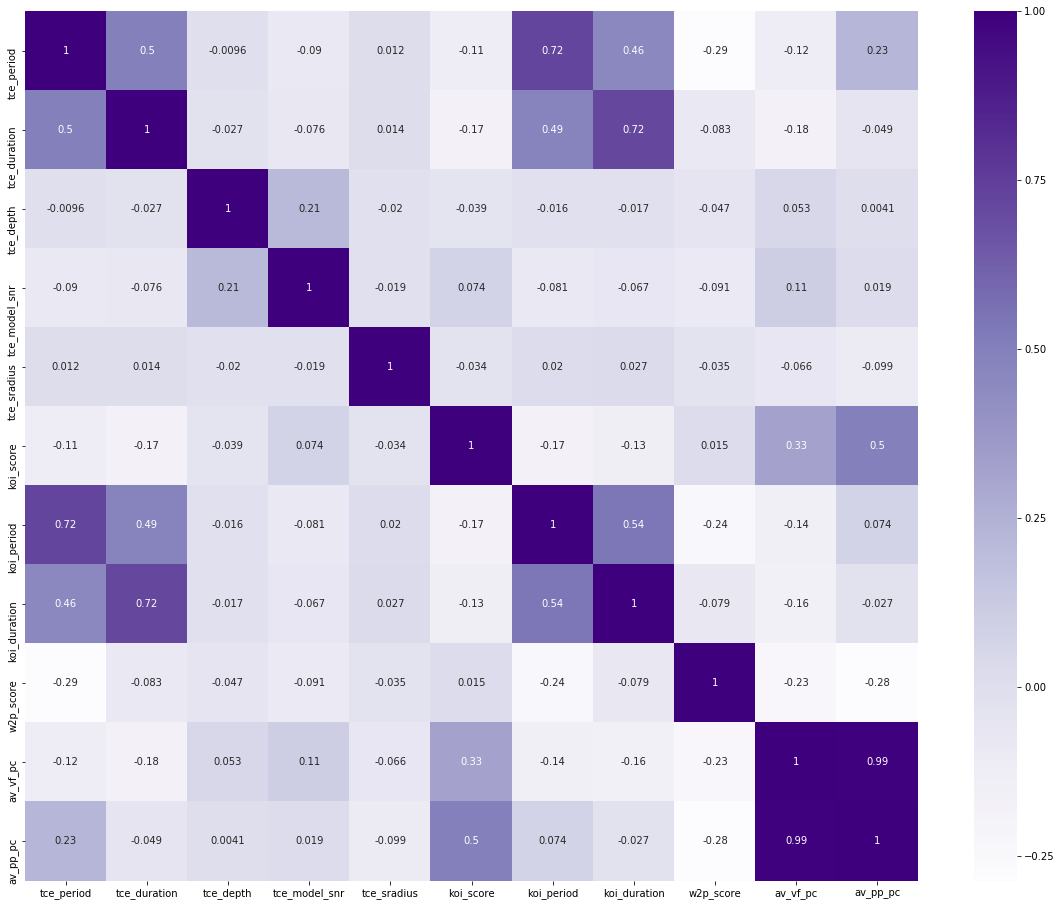

In [17]:
df2[['tce_period','tce_duration','tce_depth','tce_model_snr','tce_sradius','koi_disposition','koi_score',
         'koi_period','koi_duration','w2p_disposition','w2p_score','av_vf_pc','av_pp_pc','av_disposition']].corr()

sns.heatmap(df2[['tce_period','tce_duration','tce_depth','tce_model_snr','tce_sradius','koi_disposition','koi_score',
         'koi_period','koi_duration','w2p_disposition','w2p_score','av_vf_pc','av_pp_pc','av_disposition']].corr(),
           annot=True, cmap="Purples")
plt.rcParams['figure.figsize'] = [20, 16]
plt.show()

In [34]:
df2['w2p_vs_koi'] = abs(df2['w2p_score']-df2['koi_score'])

In [35]:
df2['w2p_vs_AV'] = abs(df2['w2p_score']-df2['av_vf_pc'])

In [38]:
#df2.sort_values(by='w2p_vs_koi', ascending=False)

In [39]:
df2.sort_values(by='w2p_vs_AV', ascending=False)

,discrepancy,kepid,tce_period,tce_duration,tce_depth,tce_model_snr,tce_sradius,koi_disposition,koi_score,koi_period,koi_duration,w2p_disposition,w2p_score,av_vf_pc,av_pp_pc,av_disposition,w2p_vs_koi,w2p_vs_AV
25660,1,9839030_1,27.293800,0.296167,339.800,7.6700,1.094,CONFIRMED,0.440,27.285315,7.4700,CONFIRMED,0.999776,0.000000,NaN,FALSE POSITIVE,0.559776,0.999776
30562,1,11442793_3,59.736900,0.355708,563.200,30.2200,1.200,CONFIRMED,0.999,59.737144,8.0006,CONFIRMED,0.997854,0.000000,NaN,FALSE POSITIVE,0.001146,0.997854
32673,1,12156930_1,71.106900,0.294417,121.000,7.7460,1.224,CONFIRMED,0.753,71.106840,6.9330,CONFIRMED,0.980750,0.000000,NaN,FALSE POSITIVE,0.227750,0.980750
15254,1,7219825_3,26.695200,0.193792,118.300,10.7500,1.216,CONFIRMED,0.784,362.978280,14.0830,CONFIRMED,0.975521,0.000000,NaN,FALSE POSITIVE,0.191520,0.975521
31268,1,11284772_2,4.501550,0.078167,164.300,8.1500,0.553,CONFIRMED,0.977,4.501582,1.8550,CONFIRMED,0.967513,0.000000,NaN,FALSE POSITIVE,0.009487,0.967513
2558,1,3231341_4,330.913000,0.407708,501.900,7.1400,1.240,CONFIRMED,0.999,4.244390,3.2820,FALSE POSITIVE,0.001787,0.967727,98.9339,CONFIRMED,0.997213,0.965940
10732,1,6462874_3,10.423600,0.245583,724.500,15.2500,0.580,FALSE POSITIVE,0.000,NaN,NaN,CONFIRMED,0.965038,0.000000,NaN,FALSE POSITIVE,0.965038,0.965038
29997,1,10544677_1,19.735300,0.201542,299.800,14.9000,1.045,FALSE POSITIVE,0.002,19.735287,5.0970,CONFIRMED,0.973607,0.011300,0.0222,FALSE POSITIVE,0.971607,0.962307
9954,1,5816144_1,12.497100,0.161667,194.200,10.9600,1.021,CONFIRMED,1.000,12.497060,3.8770,CONFIRMED,0.961985,0.000000,NaN,FALSE POSITIVE,0.038015,0.961985
4411,1,4048898_1,13.091500,0.083417,39.180,8.7690,1.288,CONFIRMED,0.967,13.091488,2.0370,CONFIRMED,0.961391,0.000000,NaN,FALSE POSITIVE,0.005609,0.961391
